Number of Benign:  357
Number of Malignant :  212


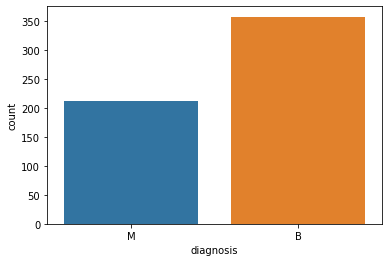

In [1]:
#Classification of cancer dignosis
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time

#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('cancer.csv')

# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )

ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

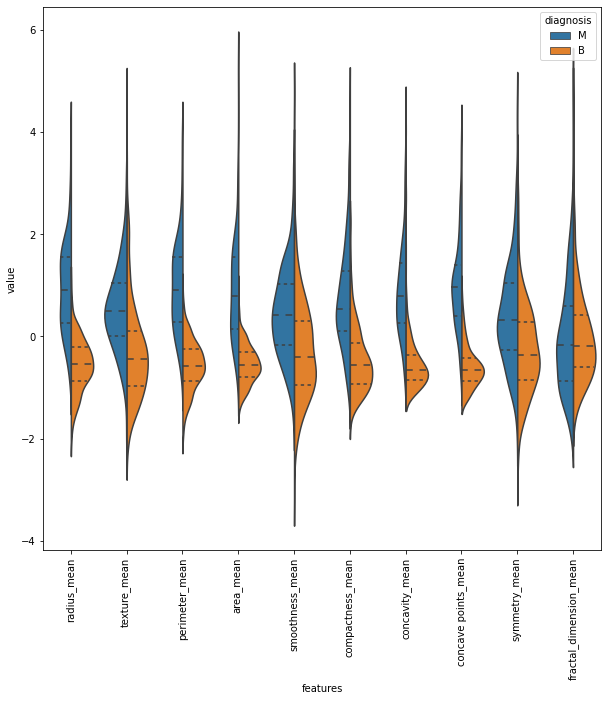

In [2]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

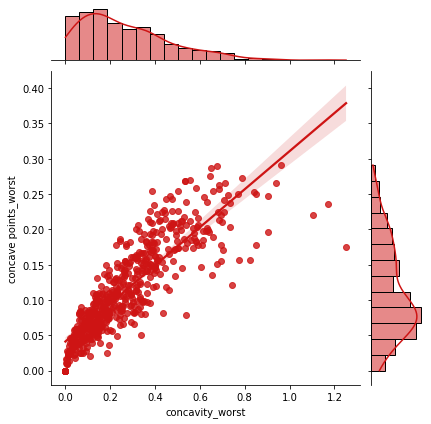

In [3]:
sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:,'concave points_worst'], kind="reg", color="#ce1414")

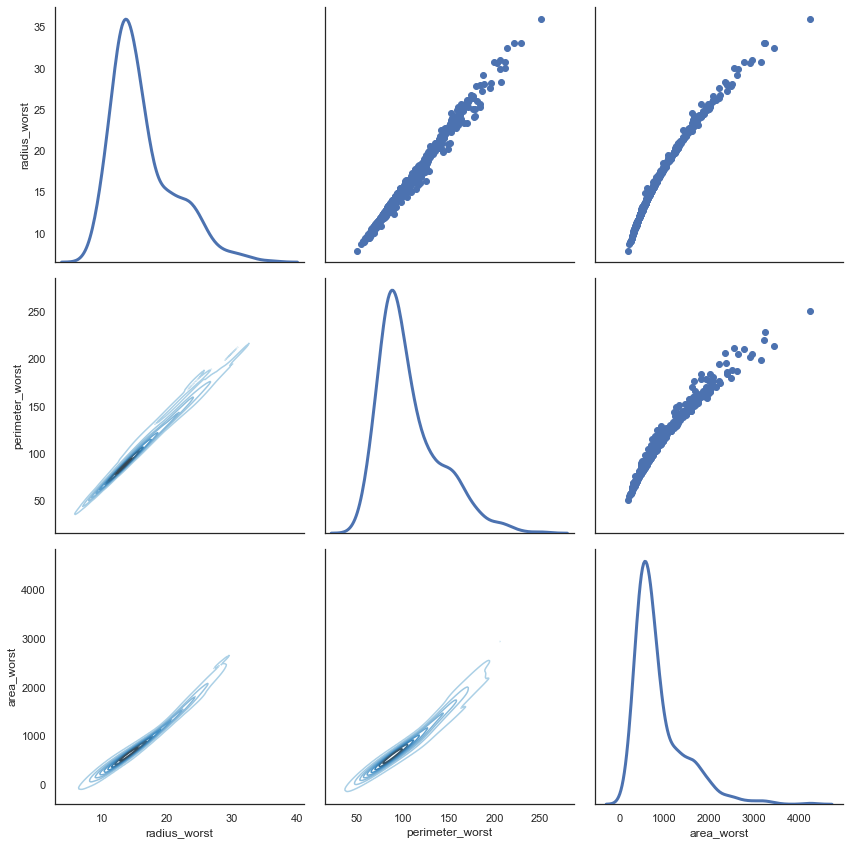

In [4]:
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False, height=4)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

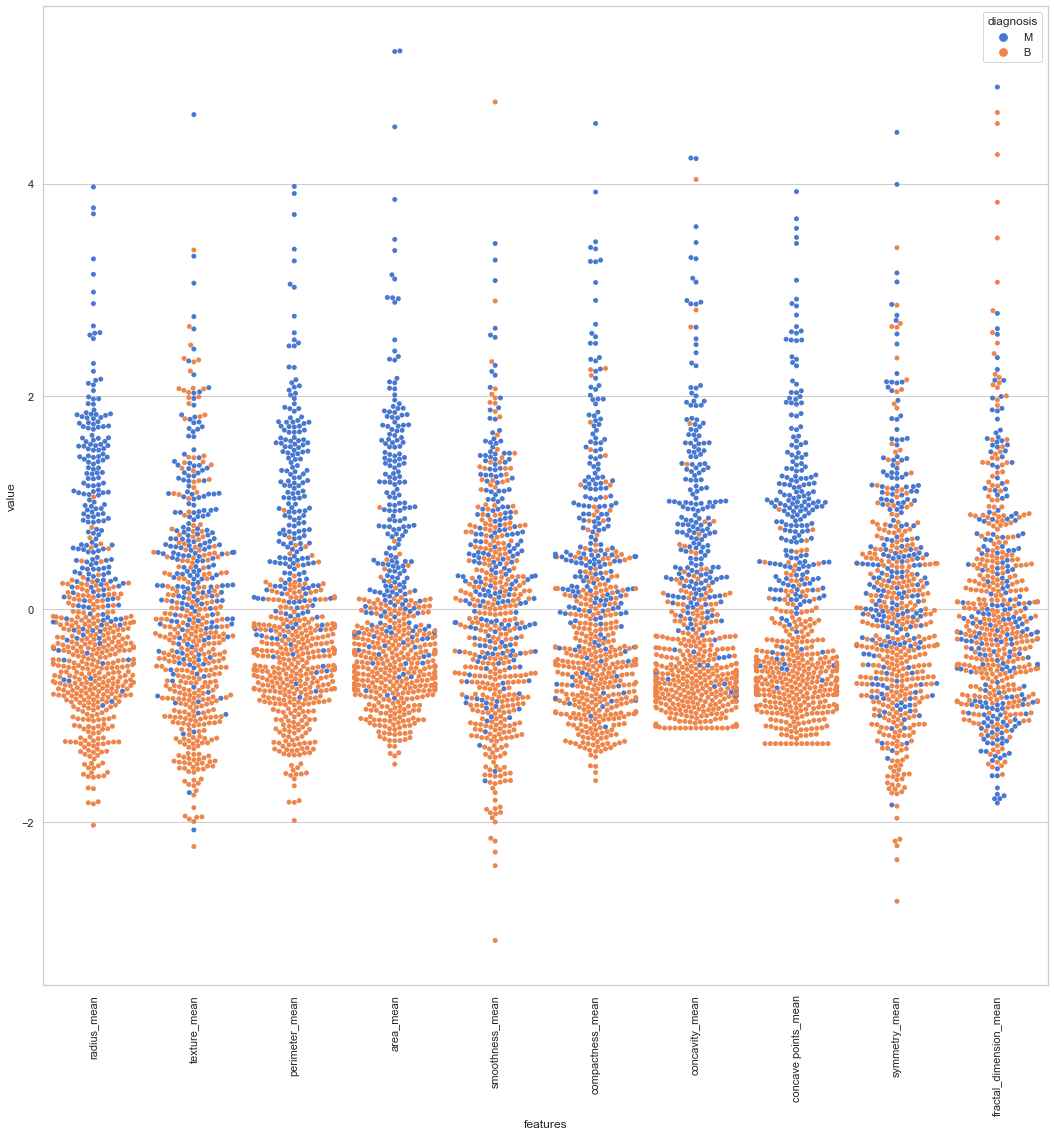

In [5]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(18,18))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

<AxesSubplot:>

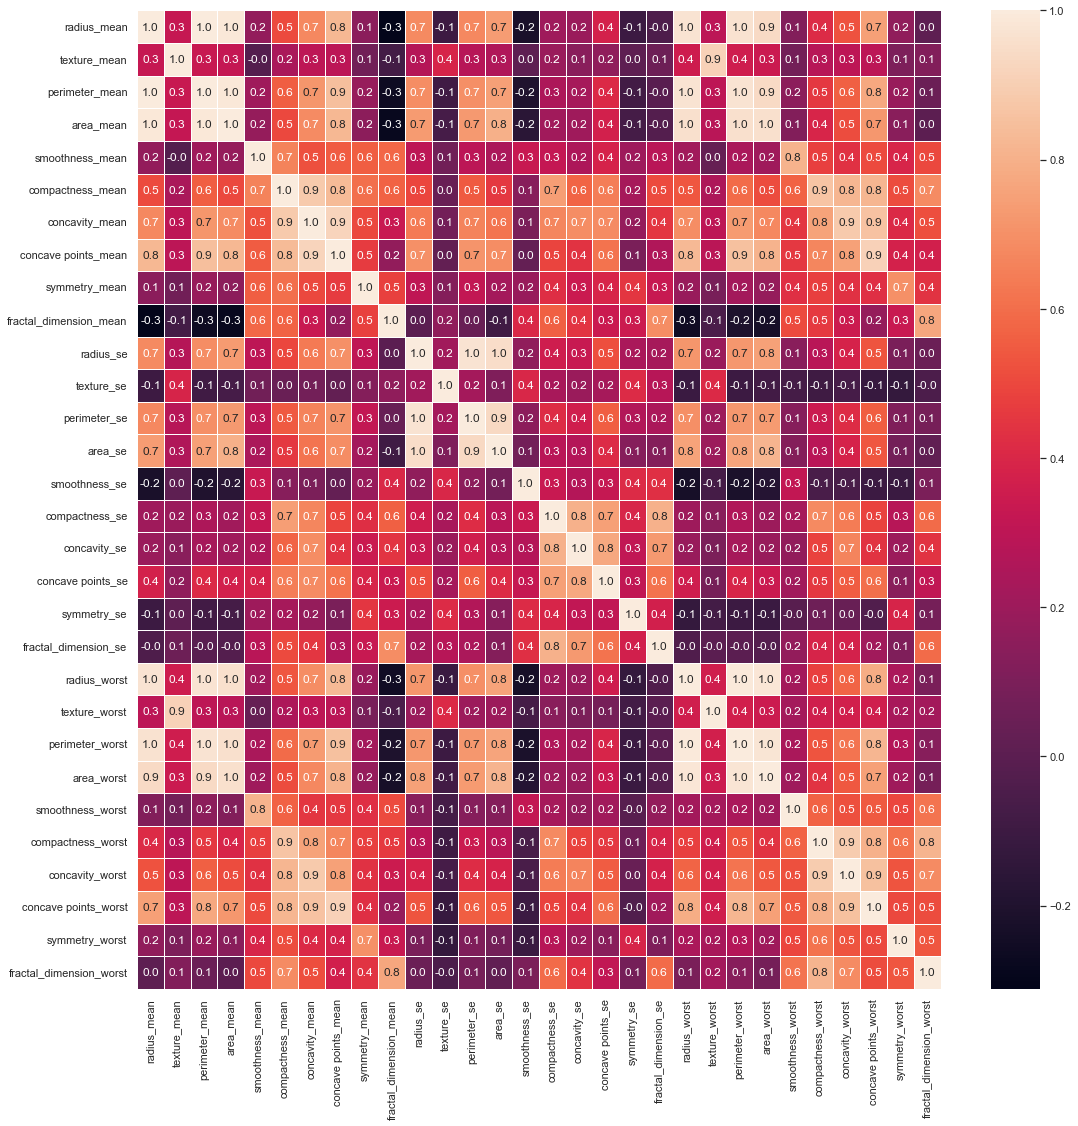

In [6]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<AxesSubplot:>

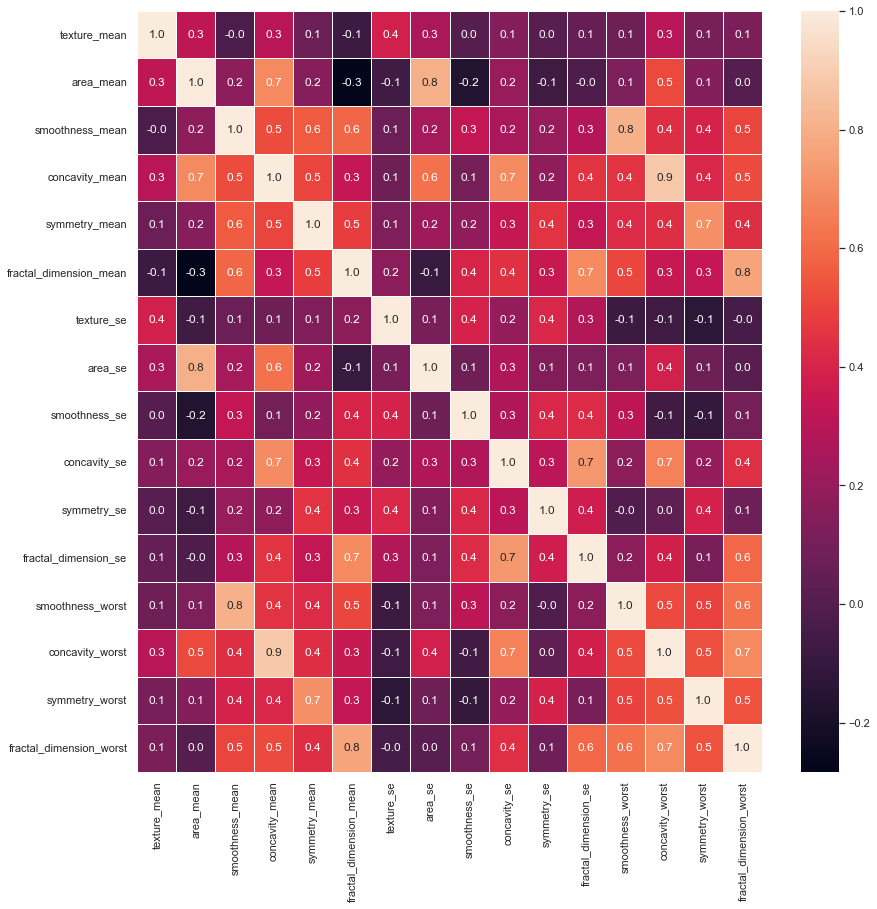

In [7]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 

#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score


# split data train 70 % and test 30 %
X_train, x_test, Y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

The f1_score for DTC is 0.9246
The precision for DTC is 0.9246
The recall for DTC is 0.9246
The accuracy for DTC is 0.9298 



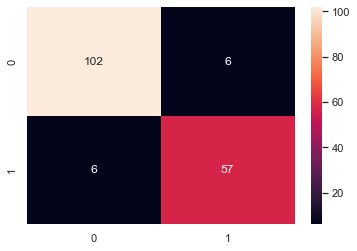

In [9]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

classifierDTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifierDTC.fit(X_train, Y_train)


cm = confusion_matrix(y_test,classifierDTC.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

print("The f1_score for DTC is %.4f" %f1_score(y_test, classifierDTC.predict(x_test), average="macro")) 
print("The precision for DTC is %.4f" %precision_score(y_test, classifierDTC.predict(x_test), average="macro")) 
print("The recall for DTC is %.4f" %recall_score(y_test, classifierDTC.predict(x_test), average="macro"))
print("The accuracy for DTC is %.4f" %accuracy_score(y_test, classifierDTC.predict(x_test)),"\n")

The f1_score for RFC is 0.9620
The precision for RFC is 0.9654
The recall for RFC is 0.9590
The accuracy for RFC is 0.9649 



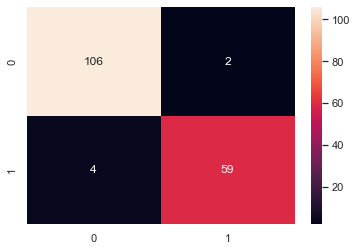

In [10]:
from sklearn.ensemble import RandomForestClassifier

#random forest classifier with n_estimators=10 (default)
classifierRFC = RandomForestClassifier(random_state=43)      
classifierRFC = classifierRFC.fit(X_train,Y_train)

cm = confusion_matrix(y_test,classifierRFC.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

print("The f1_score for RFC is %.4f" %f1_score(y_test, classifierRFC.predict(x_test), average="macro")) 
print("The precision for RFC is %.4f" %precision_score(y_test, classifierRFC.predict(x_test), average="macro")) 
print("The recall for RFC is %.4f" %recall_score(y_test, classifierRFC.predict(x_test), average="macro"))
print("The accuracy for RFC is %.4f" %accuracy_score(y_test, classifierRFC.predict(x_test)),"\n")

The f1_score for LR is 0.9436
The precision for LR is 0.9422
The recall for LR is 0.9451
The accuracy for LR is 0.9474 



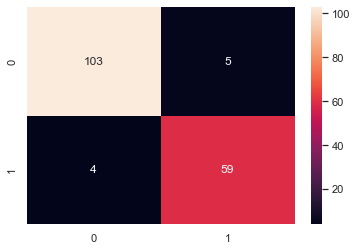

In [11]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression

classifierLR = LogisticRegression(random_state = 0)
classifierLR.fit(X_train, Y_train)

cm = confusion_matrix(y_test,classifierLR.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

print("The f1_score for LR is %.4f" %f1_score(y_test, classifierLR.predict(x_test), average="macro")) 
print("The precision for LR is %.4f" %precision_score(y_test, classifierLR.predict(x_test), average="macro")) 
print("The recall for LR is %.4f" %recall_score(y_test, classifierLR.predict(x_test), average="macro"))
print("The accuracy for LR is %.4f" %accuracy_score(y_test, classifierLR.predict(x_test)),"\n")

The f1_score for LR is 0.8981
The precision for LR is 0.9045
The recall for LR is 0.8929
The accuracy for LR is 0.9064 



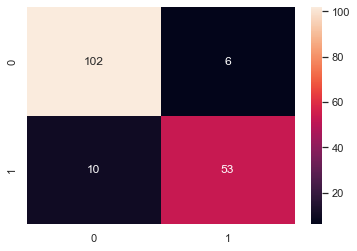

In [12]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier

classifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierKNN.fit(X_train, Y_train)

cm = confusion_matrix(y_test,classifierKNN.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

print("The f1_score for LR is %.4f" %f1_score(y_test, classifierKNN.predict(x_test), average="macro")) 
print("The precision for LR is %.4f" %precision_score(y_test, classifierKNN.predict(x_test), average="macro")) 
print("The recall for LR is %.4f" %recall_score(y_test, classifierKNN.predict(x_test), average="macro"))
print("The accuracy for LR is %.4f" %accuracy_score(y_test, classifierKNN.predict(x_test)),"\n")

The f1_score for SVCL is 0.9623
The precision for SVCL is 0.9623
The recall for SVCL is 0.9623
The accuracy for SVCL is 0.9649 



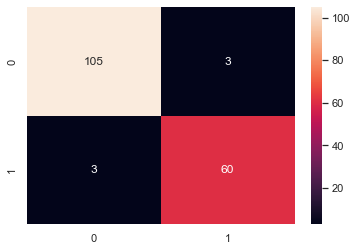

In [13]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC

classifierSVCL = SVC(kernel = 'linear', random_state = 0)
classifierSVCL.fit(X_train, Y_train)


cm = confusion_matrix(y_test,classifierSVCL.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

print("The f1_score for SVCL is %.4f" %f1_score(y_test, classifierSVCL.predict(x_test), average="macro")) 
print("The precision for SVCL is %.4f" %precision_score(y_test, classifierSVCL.predict(x_test), average="macro")) 
print("The recall for SVCL is %.4f" %recall_score(y_test, classifierSVCL.predict(x_test), average="macro"))
print("The accuracy for SVCL is %.4f" %accuracy_score(y_test, classifierSVCL.predict(x_test)),"\n")

The f1_score for SVCR is 0.8708
The precision for SVCR is 0.9252
The recall for SVCR is 0.8492
The accuracy for SVCR is 0.8889 



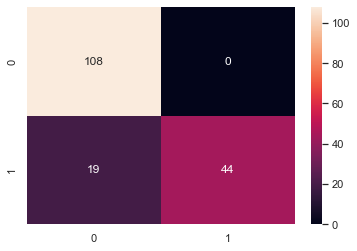

In [14]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC

classifierSVCR = SVC(kernel = 'rbf', random_state = 0)
classifierSVCR.fit(X_train, Y_train)


cm = confusion_matrix(y_test,classifierSVCR.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

print("The f1_score for SVCR is %.4f" %f1_score(y_test, classifierSVCR.predict(x_test), average="macro")) 
print("The precision for SVCR is %.4f" %precision_score(y_test, classifierSVCR.predict(x_test), average="macro")) 
print("The recall for SVCR is %.4f" %recall_score(y_test, classifierSVCR.predict(x_test), average="macro"))
print("The accuracy for SVCR is %.4f" %accuracy_score(y_test, classifierSVCR.predict(x_test)),"\n")

The f1_score for GANB is 0.9241
The precision for GANB is 0.9272
The recall for GANB is 0.9213
The accuracy for GANB is 0.9298 



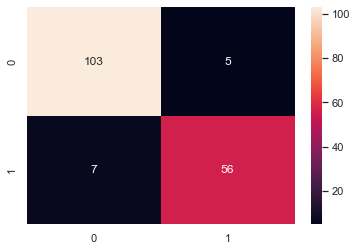

In [15]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

classifierGANB = GaussianNB()
classifierGANB.fit(X_train, Y_train)


cm = confusion_matrix(y_test,classifierGANB.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

print('The f1_score for GANB is %.4f' %f1_score(y_test, classifierGANB.predict(x_test), average="macro")) 
print("The precision for GANB is %.4f" %precision_score(y_test, classifierGANB.predict(x_test), average="macro")) 
print("The recall for GANB is %.4f" %recall_score(y_test, classifierGANB.predict(x_test), average="macro"))
print("The accuracy for GANB is %.4f" %accuracy_score(y_test, classifierGANB.predict(x_test)),"\n")